#### Mnist dataset accuracy change with Neural network and CNN 

In [3]:
#importing all libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import fetch_openml
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as migm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
#load the dataset
mnist = keras.datasets.mnist

In [121]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [141]:
#print the shapes of train and test set
def print_shapes_of_data(X_train=None,y_train=None,X_test=None,y_test=None):
    
    print("The input training set has shape of :",X_train.shape)
    print("The input feature test set has shape of :",X_test.shape)
    print("The output training set has shape of :",y_train.shape)
    print("The output test set has shape of :",y_test.shape)

In [142]:
print_shapes_of_data(X_train,y_train,X_test,y_test)

The input training set has shape of : (60000, 28, 28)
The input feature test set has shape of : (10000, 28, 28)
The output training set has shape of : (60000, 1)
The output test set has shape of : (10000, 1)


In [143]:
def show_img_digit(X):
    plt.imshow(X,cmap="gray")
    plt.axis("off")
    plt.show()

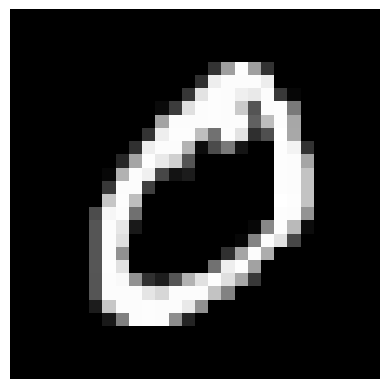

In [144]:
#the first data in X_train
show_img_digit(X_train[1,:,:])

#### Using Neural network training the model  

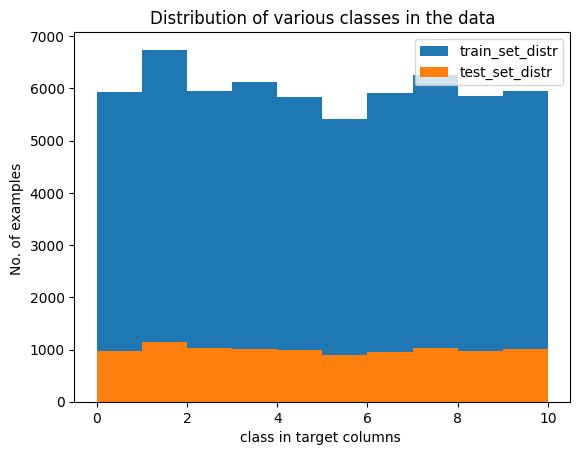

In [145]:
plt.title("Distribution of various classes in the data")
plt.hist(y_train,bins=10,range=(0,10),label="train_set_distr")
plt.hist(y_test,bins=10,range=(0,10),label="test_set_distr")
plt.legend()
plt.xlabel("class in target columns ")
plt.ylabel("No. of examples ")
plt.show()


#### Following can be inferred 
    1. It shows that in both the training set and test set the classes distribution is balance
    2. The stratified split is used to split the data 


In [146]:
#importing evaluation metrics

In [178]:
list(X_train.shape[1:])

[28, 28]

In [186]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [208]:
#Neural Network model intialization
def Neural_network_model(X_train=None,y_train=None):
    model = keras.models.Sequential([
                keras.layers.Flatten(input_shape=list(X_train.shape[1:])),
                keras.layers.Dense(units=250,activation='relu'),
                keras.layers.Dropout(0.1),
                keras.layers.Dense(units=120,activation='relu'),
                keras.layers.Dense(units=50,activation='relu'),
                keras.layers.Dense(units=10,activation='softmax')
                        ])
    
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics="accuracy")
    return model

In [209]:
model_NN = Neural_network_model(X_train,y_train)

In [210]:
model_NN.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 250)               196250    
                                                                 
 dropout_9 (Dropout)         (None, 250)               0         
                                                                 
 dense_37 (Dense)            (None, 120)               30120     
                                                                 
 dense_38 (Dense)            (None, 50)                6050      
                                                                 
 dense_39 (Dense)            (None, 10)                510       
                                                                 
Total params: 232,930
Trainable params: 232,930
Non-tr

In [ ]:
#training the model 
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)
history_NN = model_NN.fit(X_train,y_train,batch_size=300,epochs=30,validation_split=0.1,callbacks=early_stopping,verbose=0)

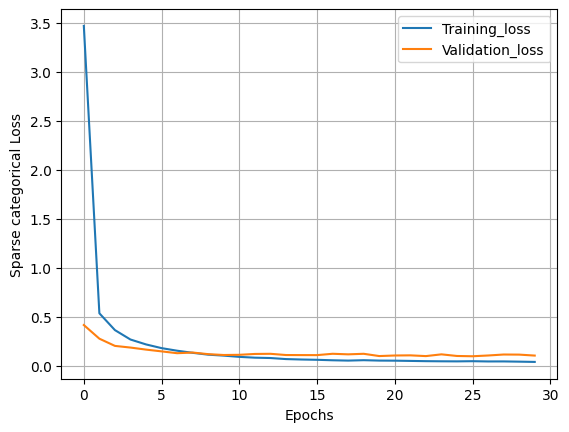

In [212]:
plt.plot(history_NN.epoch,history_NN.history['loss'],label="Training_loss")
plt.plot(history_NN.epoch,history_NN.history['val_loss'],label="Validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Sparse categorical Loss")
plt.legend()
plt.grid("both")
plt.show()

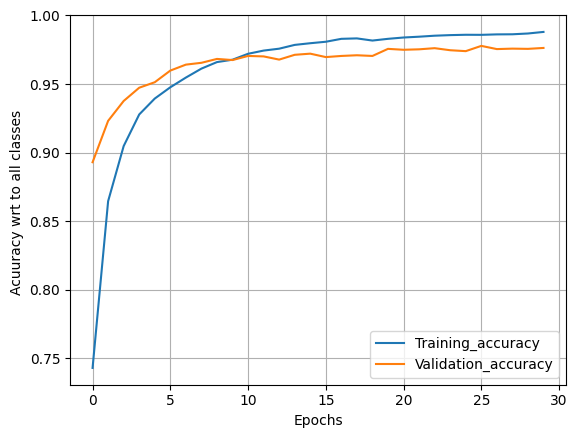

In [213]:
plt.plot(history_NN.epoch,history_NN.history['accuracy'],label="Training_accuracy")
plt.plot(history_NN.epoch,history_NN.history['val_accuracy'],label="Validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acuuracy wrt to all classes ")
plt.legend()
plt.grid("both")
plt.show()

In [214]:
y_predict_NN = model_NN.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [241]:
y_predict = np.argmax(y_predict_NN,axis=1)

In [245]:
from sklearn.metrics import confusion_matrix,classification_report

In [247]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.97      0.98      0.97      1032
         3.0       0.95      0.97      0.96      1010
         4.0       0.98      0.98      0.98       982
         5.0       0.97      0.96      0.96       892
         6.0       0.97      0.98      0.98       958
         7.0       0.98      0.98      0.98      1028
         8.0       0.96      0.96      0.96       974
         9.0       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



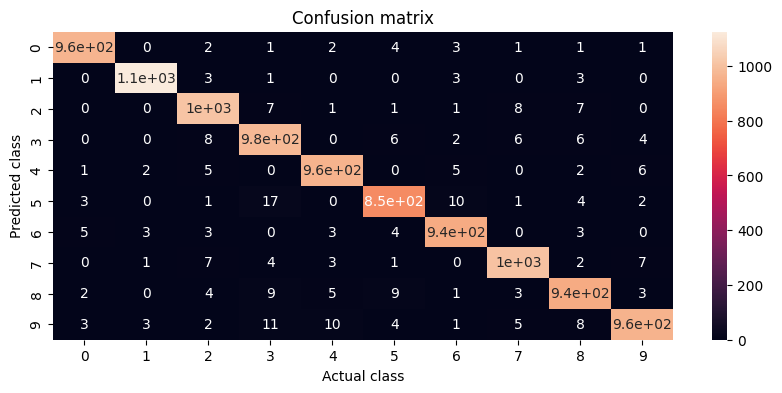

In [256]:
sm = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(10,4))
plt.title("Confusion matrix")
sns.heatmap(sm,annot=True)

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.show()